## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). **Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER.** This allows to store the time in a similar way to hours, minutes and seconds.

In [2]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2024-12-04 09:50:34--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving proxy.server (proxy.server)... 10.0.0.51
Connecting to proxy.server (proxy.server)|10.0.0.51|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/pkkpoxlm7beasryexpdf8/data_000637.txt?rlkey=rkm2em1v57hewglzelmin21c9 [following]
--2024-12-04 09:50:35--  https://www.dropbox.com/scl/fi/pkkpoxlm7beasryexpdf8/data_000637.txt?rlkey=rkm2em1v57hewglzelmin21c9
Reusing existing connection to www.dropbox.com:443.
Proxy request sent, awaiting response... 302 Found
Location: https://ucebe327dce6393b4d0deb76decb.dl.dropboxusercontent.com/cd/0/inline/CfkMhGQjPY1GN6Oe2-38MPm78jHBH1hSpZboBq0u2GWGXqHyK7k97Z5K11PWsaze9Uc1pBDkiR05f3HTcHBgqn5W_jDvmZEc-V6JpW_VVZS80ge67SKkWlOUbhdFVAPko-o/file# [following]
--2024-12-04 09:50:35--  https://ucebe327dce6393b4d0deb76decb.dl.dropboxusercontent.com/cd/0/inline/CfkMhGQjPY1GN6Oe2-38MPm78jHBH1hSpZboBq0u2GWGXqHyK7k97Z5K

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.


In [4]:
# 1)
import pandas as pd
df =pd.read_csv("/home/f789594b-0589-4f6a-a99e-f114dadcfb9b/data/data_000637.txt.2")
df
df[0:10500] ##first 10500 rows

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
10495,1,1,97,3869200272,867,24
10496,1,1,98,3869200272,865,7
10497,1,0,56,3869200272,865,0
10498,1,1,139,3869200272,871,0


2. Find out the number of BX in a ORBIT (the value 'x').

In [6]:
# 2) 
print("There are", df['BX_COUNTER'].max(), "BX in an orbit") #(max of the BX_COUNTER column)


There are 3563 BX in an orbit


3. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [8]:
# 3)
df['time_ns'] = df['ORBIT_CNT']*3564*25+df['BX_COUNTER']*25+df['TDC_MEAS']*25/30
time_last = df['time_ns'].max()-df['time_ns'].min()
print(time_last, "ns")

980416253.3125 ns


4. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [10]:
#4)
df['time_ns'] = df['ORBIT_CNT']*3564*25+df['BX_COUNTER']*25+df['TDC_MEAS']*25/30
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


5. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [12]:
#5)
import numpy.random as npr

df['HEAD']= pd.Series(npr.randint(0,2,len(df)),index=df.index) 
                    #npr.randint(low,high(excluded),size))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,0,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,0,0,139,3869211171,769,0,3.447467e+14


6. Create a new DataFrame that contains only the rows with HEAD=1.

In [14]:
newdf = df.copy()
newdf[newdf["HEAD"]==1]
##you need to create a copy and then modify it

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
7,1,0,139,3869200167,2776,0,3.447457e+14
...,...,...,...,...,...,...,...
1310711,1,1,39,3869211171,430,0,3.447467e+14
1310714,1,0,60,3869211171,762,2,3.447467e+14
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14


7\. Make two occupancy plots (one for each of the two FPGA), i.e. plot the number of counts per TDC_Channel in a histogram, one for DataFRame with FPGA=1, one with FPGA=0.

139


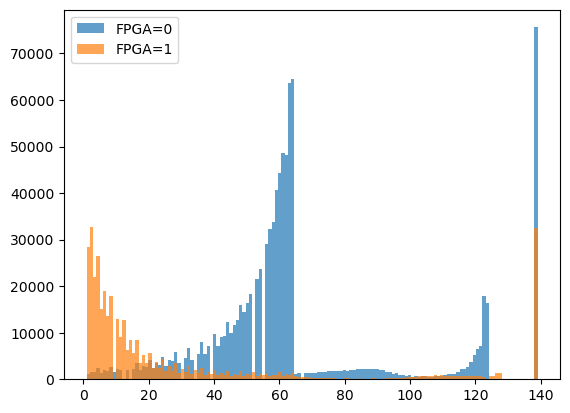

In [16]:
from matplotlib import pyplot as plt
N=df['TDC_CHANNEL'].max()
print(N)

plt.hist(df[df['FPGA']==0]['TDC_CHANNEL'],alpha=0.7,bins=139)
plt.hist(df[df['FPGA']==1]['TDC_CHANNEL'],alpha=0.7,bins=139)
plt.legend(['FPGA=0', 'FPGA=1'],loc='best')
plt.show()

8 \. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [18]:
grouped_channels= df.groupby('TDC_CHANNEL').size()
grouped_channels.sort_values()[-3:] ##sort_values() orders from lowest to highest, and take the last three elements 


TDC_CHANNEL
63      64642
64      66020
139    108059
dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [20]:
grouped_orbits= df.groupby('ORBIT_CNT').size()
print(grouped_orbits)
print("There are", len(grouped_orbits), "orbits with at least one measurement")

ORBIT_CNT
3869200167     43
3869200168     85
3869200169    127
3869200170     98
3869200171    109
             ... 
3869211167    208
3869211168    109
3869211169    191
3869211170    137
3869211171     22
Length: 11001, dtype: int64
There are 11001 orbits with at least one measurement


In [21]:
#number of unique orbits with at least one measurement from TDC_CHANNEL=139

masked_df = df[df["TDC_CHANNEL"]==139]
grouped_masked_df= masked_df.groupby('ORBIT_CNT').size()
print("There are", len(grouped_masked_df), "orbits with at least one measurement from TDC_CHANNEL=139")


There are 10976 orbits with at least one measurement from TDC_CHANNEL=139
